# Project: **A Classification Model of Restaurant Reviews through Natural Language Processing**
_____

Author: **Daniel Eduardo López**

#####<a href="https://github.com/DanielEduardoLopez"> GitHub </a>

#####<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"> LinkedIn </a> 

### **1. Goal**

To develop several bag-of-words models for classificating restaurant reviews into positive or negative through Natural Language Processing (NLP) and selecting the one with the highest accuracy rate.
___
### **2. Research Question**

Which bag-of-words model for classificating restaurant reviews into positive or negative is able to yield the highest accuracy?
___
### **3. Hypothesis**

A bag-of-words model based on **Random Forests** for classificating restaurant reviews into positive or negative will yield the highest accuracy.
___
### **4. Methodology**

The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1. **Analytical approach**: Building and evaluation of classification models.
2. **Data requirements**: Reviews of a restaurant and their corresponding labels (0 for negative and 1 for positive).
3. **Data collection**: Data was retrieved from <a href="https://www.kaggle.com/datasets/vigneshwarsofficial/reviews">Kaggle</a>.
4. **Data exploration and preparation**: Data then was explored and cleaned with Python 3 and its libraries Numpy, Pandas, Regular Expressions, and the Natural Language Toolkit.
5. **Data modeling**: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Trees, Random Forests, and XGBoost classifications models were fitted and tunned using Python 3 and its libraries Numpy, Pandas, and Sklearn. 
6. **Evaluation**: The models were primarily evaluated through the accuracy rate, but also by using confusion matrices and classification reports.
___

### **5. Results**

#### **5.1 Data Collection**
As mentioned before, data about restaurant reviews and its corresponding labels was retrieved from <a href="https://www.kaggle.com/datasets/vigneshwarsofficial/reviews">Kaggle</a>.

In [1]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
sns.set_theme(context = "notebook", style ="darkgrid")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/DanielEduardoLopez/RestaurantReviews/61343b57c96225bc512445d33b93ecf9daafef33/Restaurant_Reviews.tsv', sep = "\t", quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### **5.2 Data Exploration**
The data was explored to identify its general features and characteristics.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
x = df.Liked.value_counts()
print(f"The amount positive reviews is {x[1]}. And the amount of negative reviews is {x[0]}.")

The amount positive reviews is 500. And the amount of negative reviews is 500.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Reviews')

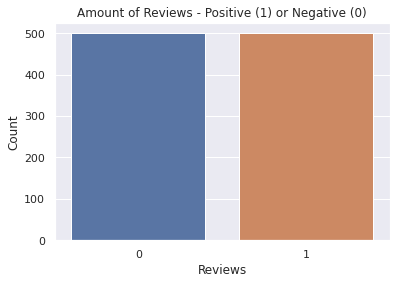

In [7]:
plt.title("Amount of Reviews - Positive (1) or Negative (0)")
# Bar chart showing amount of both target values
sns.barplot(x.index, x)
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Reviews")

In [11]:
# Create a new feature with text lenght, or number of characters
df['length'] = df['Review'].str.len()
# Create a new feature with number of words
df['num_words'] = df['Review'].str.split().map(lambda x: len(x))
df.head()

,Review,Liked,length,num_words
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [12]:
# Text length summary by target
df.groupby(['Liked']).length.describe()

,count,mean,std,min,25%,50%,75%,max
Liked,,,,,,,,
0,500.0,60.75,34.224935,11.0,33.00,52.5,84.00,149.0
1,500.0,55.88,30.219464,11.0,32.75,49.5,73.25,148.0


Text(0.5, 1.0, 'Negative Review')

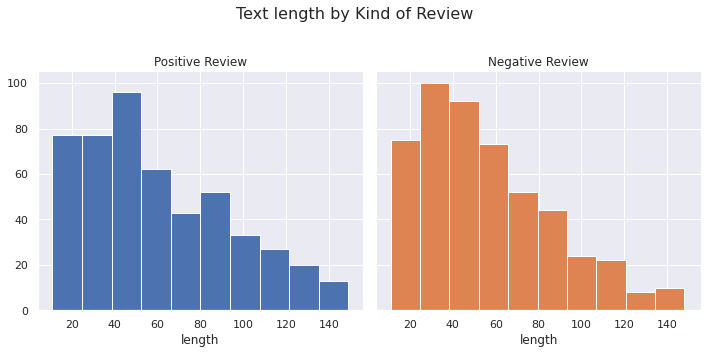

In [14]:
# Facet a plot by target column
g = sns.FacetGrid(df, col = 'Liked', height = 5, hue = 'Liked')
# Plot a histogram chart
g.map(plt.hist, "length")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Text length by Kind of Review', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Negative Review")
axes[1].set_title("Positive Review")
     

In [15]:
# Number of words summary by target
df.groupby(['Liked']).num_words.describe()

,count,mean,std,min,25%,50%,75%,max
Liked,,,,,,,,
0,500.0,11.498,6.611916,2.0,6.0,10.0,16.00,32.0
1,500.0,10.290,5.825958,1.0,6.0,9.0,13.25,32.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Positive Review')

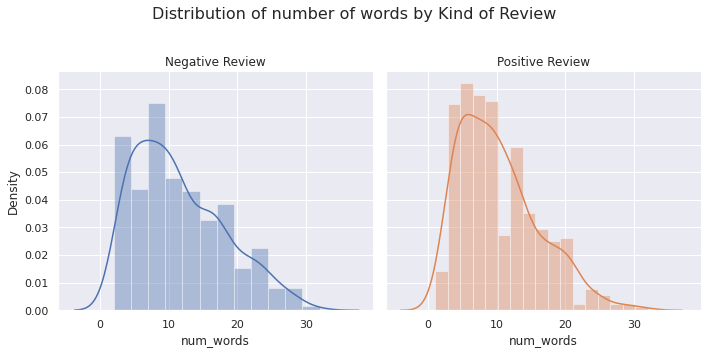

In [16]:
# Facet a plot by target column
g = sns.FacetGrid(df, col = 'Liked', height = 5, hue = 'Liked')
# Plot a histogram chart
g.map(sns.distplot, "num_words")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Distribution of number of words by Kind of Review', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Negative Review")
axes[1].set_title("Positive Review")   


Text(0.5, 0, 'Kind of Review')

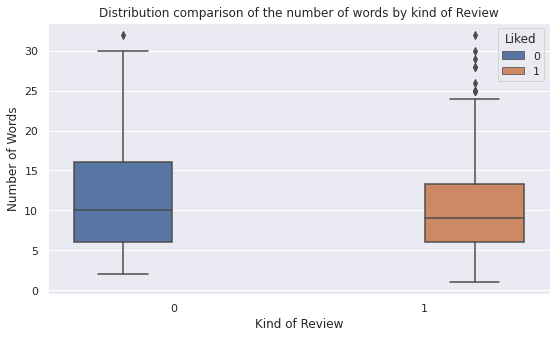

In [17]:
# Boxplot for comparing distribution of number of words by Kind of Review
plt.figure(figsize=(9,5))
# Add title
plt.title("Distribution comparison of the number of words by kind of Review")
# Boxplot
sns.boxplot(x = "Liked", y = "num_words", hue="Liked", data = df)
# Add label for vertical axis
plt.ylabel("Number of Words")
# Add label for hotizontal axis
plt.xlabel("Kind of Review")

In [22]:
# Unique words counter function
# Reference https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud#kln-160
# Function to compute many unique words have this text
from collections import Counter

def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [23]:
# Unique words
text_values = df["Review"]

counter = counter_word(text_values)
print(f"The training dataset has {len(counter)} unique words")   


The training dataset has 2967 unique words


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

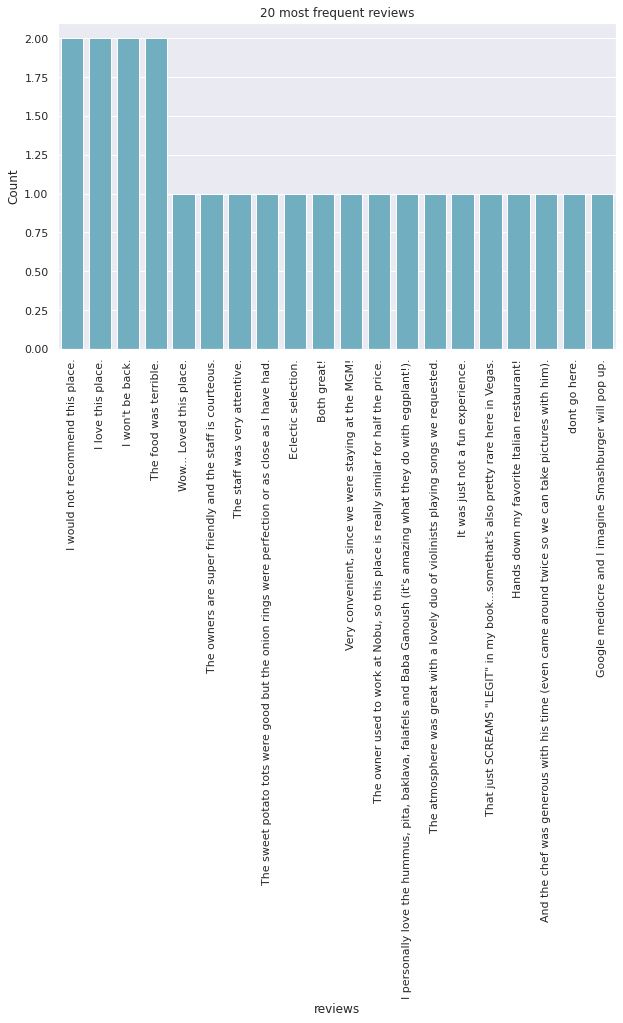

In [26]:
# Groups the top 20 reviews
x = df.Review.value_counts()[:20]
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("20 most frequent reviews")
# Bar chart showing amount of both target values
sns.barplot(x.index, x, color="c")
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("reviews")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=90)
     


### **6. Conclusions**

### **7. References**
* **Rollins, J. B. (2015)**. *Metodología Fundamental para la Ciencia de Datos. Somers: IBM Corporation.* Retrieved from https://www.ibm.com/downloads/cas/WKK9DX51

In [8]:
# End